<h1>Covarance and Correlation</h1>

The two terms are often used interchangeably. Though similar, they are not the same. From Deepak Gupta's definition: Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable.

Covarance Matrix <br>
example: vector x, y <br>
Covarance Matrix of these 2 vectors = 
$ \begin{bmatrix}
var(x) & cov(x,y)\\
cov(y,x) & var(y)
\end{bmatrix} $ <br>
where <br>
$ var(x) = \sigma^2 = \frac{\Sigma(x-\bar{x})^2}{n-1}  $ , 
$ cov(x,y) = \frac{\Sigma(x_i-\bar{x})(y_i-\bar{y})}{n-1}  $ <br>
Correlation Matrix <br>
using same vector x, y <br>
Correlation Matrix of these 2 vectors = 
$ \begin{bmatrix}
1 & cor(x,y)\\
cor(y,x) & 1
\end{bmatrix} $ <br> where <br> 
$ cor(x,y) = \frac{cov(x,y)}{\sigma_{x} * \sigma_{y}}  $


In [36]:
#covarance matrix
import numpy as np
my_covarnace_matrix = np.matrix([[6, 2, 4], [6, 4, 8]])
print("var(x) = ",np.var(my_covarnace_matrix[0], ddof=1)) # var(X)
print("var(y) = ",np.var(my_covarnace_matrix[1], ddof=1)) # var(Y)
x_x_mean = my_covarnace_matrix[0] - my_covarnace_matrix[0].mean()
y_y_mean = my_covarnace_matrix[1] - my_covarnace_matrix[1].mean()
print("x-\u03BC = ", x_x_mean,"; y-\u03BC = ", y_y_mean)
n = my_covarnace_matrix[0].shape[1] # x and y are 3 element array, n=3
print(x_x_mean * y_y_mean.T /(n-1)) # cov(x,y)
print(y_y_mean * x_x_mean.T /(n-1)) # cov(y,x)
print("Therefore X, Y covarnace matrix = ")
print(np.cov(my_covarnace_matrix))


var(x) =  4.0
var(y) =  4.0
x-μ =  [[ 2. -2.  0.]] ; y-μ =  [[ 0. -2.  2.]]
[[2.]]
[[2.]]
Therefore X, Y covarnace matrix = 
[[4. 2.]
 [2. 4.]]


In [37]:
#covarance matrix
np.corrcoef(my_covarnace_matrix)

array([[1. , 0.5],
       [0.5, 1. ]])

Above is Pearson correlation coefficient. For Pandas implementation

In [46]:
import pandas as pd
x = pd.Series([6, 2, 4])
y = pd.Series([6, 4, 8])
print(x.corr(y))
print(y.corr(x))
# x.corr(y, method='spearman')  # Spearman's rho requires scipy
# x.corr(y, method='kendall')   # Kendall's tau, requires scipy

0.5
0.5


Noneparametric correlation analysis
for correlation between categorical, nonlinear, non-nornally distrubted variables

Spearman's Rank correlation
find R correlation between variable-pairs of oridnal data type
same as Pearson, R=-1, 0, 1

Chi-Square test for independence
p < 0.05 (5%) : reject null hypothesis and conclude that the variables are correlated
p > 0.05 (5%) : accept null hypothesis and conclude that the variables are independent
Note, Depending on the cost of making mistakes, the researcher may apply more stringent criteria for declaring significance, such as .01 or .005.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

%matplotlib inline
rcParams['figure.figsize'] = 14, 7
plt.style.use("seaborn-whitegrid")

In [65]:
diamond = sn.load_dataset('diamonds')
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [66]:
# row is index, column is columns, default agg function is the number of observations in each combination
pd.crosstab( index=diamond['cut'], columns=diamond['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [68]:
meanprice = pd.crosstab(index=diamond['cut'], columns=diamond['color'], values=diamond['price'], aggfunc=np.mean)
#average price of the diamond, cut in certain way and in certain color
meanprice

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


Text(0.5, 1.0, 'Mean price of diamonds')

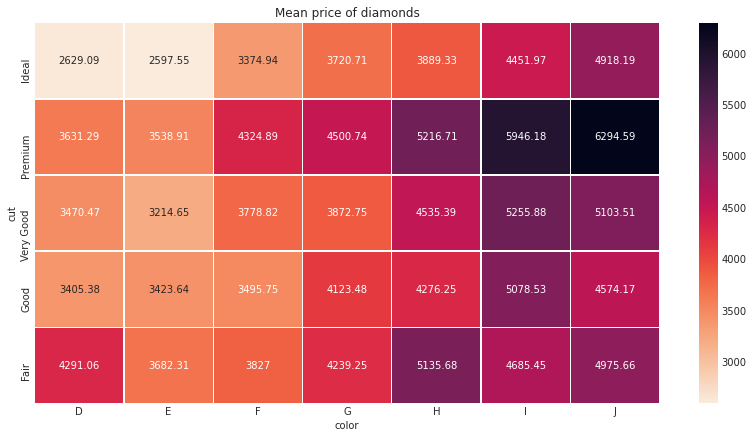

In [86]:
sn.heatmap(meanprice, cmap='rocket_r', annot=True, fmt='g', linewidths=.3) # fmt = 'g' displays numbers as int instead of scientific notation
plt.title("Mean price of diamonds")

In [11]:
# Spearman's Rank correlation
spearmanr_coeffient, p_value = spearmanr(planets['Diameter'], planets['DayLength'])
print("Spearman nonlinear correlation coefficient between Diameter and DayLength ", spearmanr_coeffient)
spearmanr_coeffient, p_value = spearmanr(planets['MeanTemperature'], planets['SunDistance'], nan_policy='omit')
print("Spearman nonlinear correlation coefficient between MeanTemperature and SunDistance ", spearmanr_coeffient)
spearmanr_coeffient, p_value = spearmanr(planets['OrbitPeriod'], planets['SunDistance'], nan_policy='omit')
print("Spearman nonlinear correlation coefficient between OrbitPeriod and SunDistance ", spearmanr_coeffient)

Spearman nonlinear correlation coefficient between Diameter and DayLength  -0.006060606060606061
Spearman nonlinear correlation coefficient between MeanTemperature and SunDistance  -0.9833333333333333
Spearman nonlinear correlation coefficient between OrbitPeriod and SunDistance  0.18787878787878787


Chi-square test for independence

In [17]:
diamonds = sn.load_dataset('diamonds')
diamonds.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
xx = sn.load_dataset()